# IMPORTING LIBRARIES

In [235]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [139]:
#Loading file into df
df = pd.read_csv('Train.csv')

# Gaining basic Insights from the data and Data Cleansing

In [141]:
#Reading the top 5 rows of the dataset
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,2015-09-01,0.06,3,0
1,2243769,Super Bowl New York City Apartment,11460768,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1,0,NaN,NaN,1,0
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4,2019-07-05,4.00,1,365
3,36202006,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0,NaN,NaN,4,82
4,3780951,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,2019-05-26,0.27,1,365


In [143]:
#Checking the dimensions of the dataset
df.shape

(34226, 16)

In [145]:
#Checking datatypes
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**8 numerical columns and 5 categorical columns**

In [147]:
#Ananlysing basic statistical details
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.422600e+04,3.422600e+04,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,27244.000000,34226.000000,34226.000000
mean,1.898209e+07,6.733847e+07,40.729059,-73.952070,153.480979,6.953690,23.390931,1.377074,7.093905,113.301730
std,1.097597e+07,7.833091e+07,0.054604,0.046161,243.312608,20.255833,44.476822,1.688953,32.828412,131.892814
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.460366e+06,7.824440e+06,40.690040,-73.983150,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.965371e+07,3.065628e+07,40.722995,-73.955700,107.000000,2.000000,5.000000,0.730000,1.000000,45.000000
75%,2.908201e+07,1.074344e+08,40.763200,-73.935982,175.000000,5.000000,24.000000,2.020000,2.000000,229.000000
max,3.648724e+07,2.743115e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**1. 
There are rows with price = 0 and as high as 10000 - 75% of the data lies within 175dollars - the price column has outliers**
-The dataset consists of mostly budget homes


**2. The minimum_nights has minimum value as 1 and maximum 1250 - 75% of the data rents for 5 nights - indicates outliers that could affect the model**


**3. The availability_365 column has minimum value 0 - the properties are rented out/ not available for rent anymore**


**4. The calculated_host_listings_count has min = 1 and max = 327**


**5. The latitude and longitude info reveals maximum data from Manhattan and Brooklyn - Will be confirmed further**

In [149]:
#Checking for duplicate values
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: {}".format(duplicate_rows_df.shape))

number of duplicate rows: (0, 16)


**Zero duplicate rows**

In [151]:
#Checking for duplicate host_ID and host_name values
print('Number of duplicate Host IDs: {}'.format(df.duplicated(subset = 'host_id').value_counts()))
print('Number of duplicate Host names {}'.format(df.duplicated(subset = 'host_name').value_counts()))

Number of duplicate Host IDs: False    27449
True      6777
dtype: int64
Number of duplicate Host names True     24935
False     9291
dtype: int64


In [153]:
df[df['calculated_host_listings_count']>2].count()

id                                6928
name                              6927
host_id                           6928
host_name                         6927
neighbourhood_group               6928
neighbourhood                     6928
latitude                          6928
longitude                         6928
room_type                         6928
price                             6928
minimum_nights                    6928
number_of_reviews                 6928
last_review                       5421
reviews_per_month                 5421
calculated_host_listings_count    6928
availability_365                  6928
dtype: int64

**The number of duplicate host_Id values is approximately equal to the count of calculated_host_listings_count which justifies the duplicate rows**
**The host_names cannot be dropped since there can be two different hosts with the same name**

In [155]:
#Checking for Null values
df.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           13
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6982
reviews_per_month                 6982
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [157]:
#Replacing null values in host_name with Unknown
df["host_name"] = df["host_name"].fillna("Unknown")

In [159]:
#Replacing null values in name with Unknown
df["name"] = df["name"].fillna("Unknown")

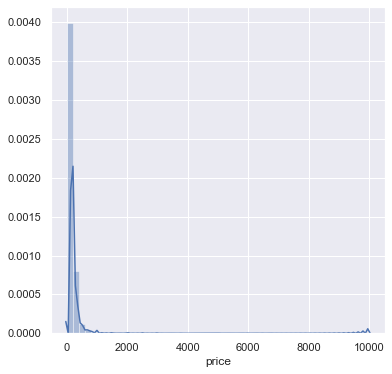

In [161]:
#Plotting a histogram for price column before cleaning
plt.figure(figsize=(6,6))
sns.distplot(df['price'])
plt.show()

**price column consists of outliers**

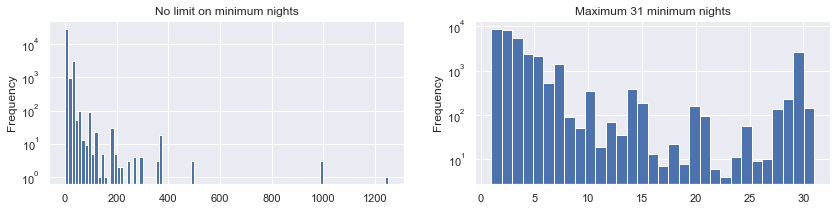

As a result of imposing minimum nights limit, 393 listings were removed.


In [163]:
#Plotting histogram for minimum_nights before cleaning
df_old=df.copy()
dfm = df[df["minimum_nights"] <=31].copy()
removed_listings = len(df_old)-len(dfm)

fig = plt.figure(figsize=(14,3))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)


ax1.hist(df_old.minimum_nights, bins=100, log=True)
ax1.set_ylabel("Frequency")
ax1.set_title("No limit on minimum nights")

ax2.hist(dfm.minimum_nights, bins=31, log=True)
ax2.set_ylabel("Frequency")
ax2.set_title("Maximum 31 minimum nights")

plt.show()

print("As a result of imposing minimum nights limit, " + str(removed_listings)+" listings were removed.")

**33833 houses(i.e. approx 99% of the dataset) lie in the range of 1-31 minimum_nights**

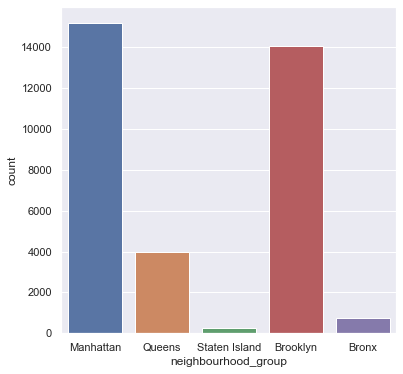

In [165]:
#plotting distribution of dataset based on neighbourhood_group
plt.figure(figsize = (6,6))
sns.countplot(x="neighbourhood_group", data=df)
plt.show()

**Maximum houses rented in Manhattan and Brooklyn**

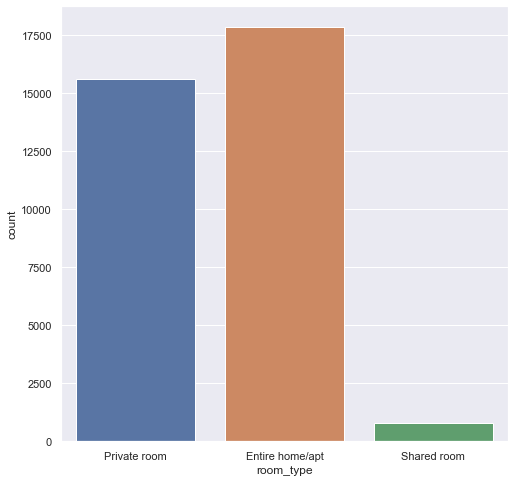

In [166]:
#Plotting distribution of the dataset based on room_type
plt.figure(figsize = (8,8))
sns.countplot(x='room_type', data=df)
plt.show()

**More number of Entire home/apt room_type**

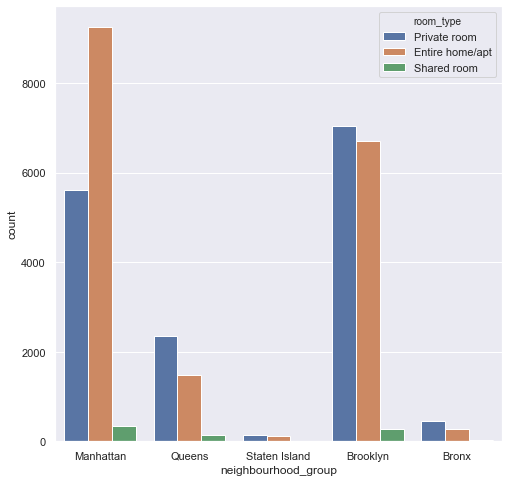

In [167]:
#Plotting distribution of the dataset based on neighbourhood_group and room_type
plt.figure(figsize = (8,8))
sns.countplot(x="neighbourhood_group",hue = 'room_type', data=df)
plt.show()

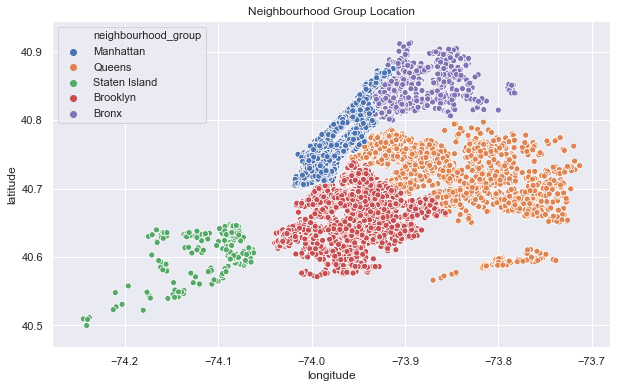

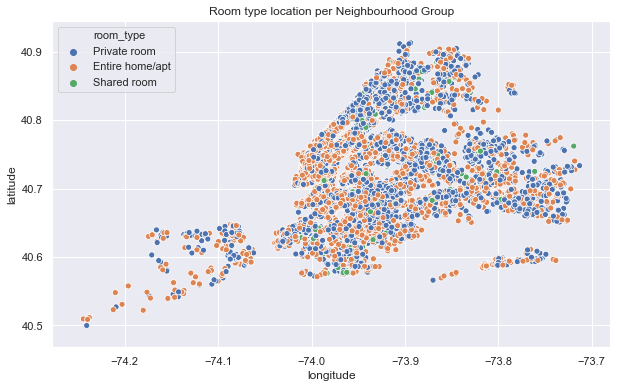

In [168]:
#Checking the location of neighbourhood_group
title = 'Neighbourhood Group Location'
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group).set_title(title)
plt.ioff()

#room_type distribution based on location
title = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.room_type).set_title(title)
plt.ioff()

**More entire homes rented in Manhattan**

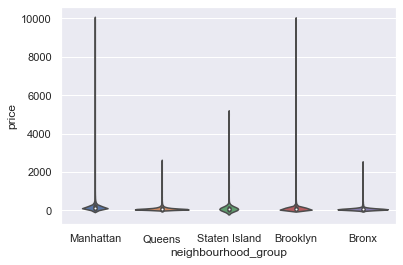

In [169]:
#Plotting different columns against price to see the correlation in the uncleaned data
#neighbourhood_group VS price
ax = sns.violinplot(x="neighbourhood_group", y="price", data=df)

**High priced houses in Manhattan and brooklyn which can cause problem in the prediction since the maximum number of budget homes are also in Manhattan and Brooklyn and these outliers can distort the prediction**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


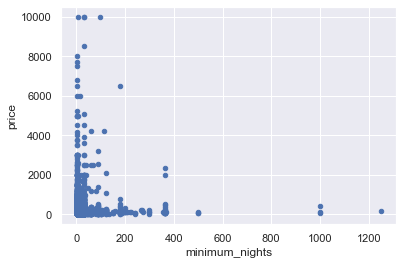

In [170]:
#price VS minimum_nights
df.plot.scatter(y = 'price', x = 'minimum_nights' )
plt.show()

****

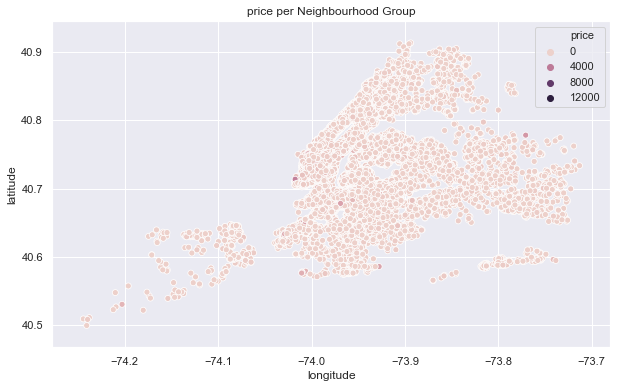

In [171]:
#price VS geography
title = 'price per Neighbourhood Group'
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.price).set_title(title)
plt.ioff()

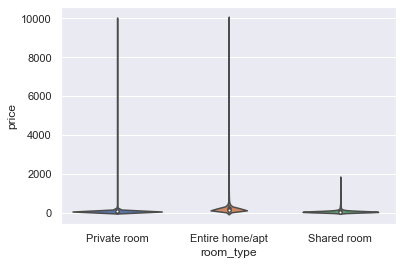

In [172]:
#price VS room_type
sns.violinplot(x="room_type", y="price", data=df)
plt.show()

**Entire home/apt has higher prices - also has the maximum count in the dataset - can distort the prediction - hence remove outliers from the price column**

In [173]:
# Checking if null values of last_review and RPM belong to same row
df[df['reviews_per_month'].isnull()].count()

id                                6982
name                              6982
host_id                           6982
host_name                         6982
neighbourhood_group               6982
neighbourhood                     6982
latitude                          6982
longitude                         6982
room_type                         6982
price                             6982
minimum_nights                    6982
number_of_reviews                 6982
last_review                          0
reviews_per_month                    0
calculated_host_listings_count    6982
availability_365                  6982
dtype: int64

**-dropping rows with nan would mean losing 20% of our data, but dropping the columns would be a loss of a possibly important predictor
-replace the nan values in the reviews_per_month with 0**

In [174]:
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

In [175]:
#making sure we don't have any nan values left 
missing_data_summary = (df.isnull().sum()/len(df))*100
missing_data_summary

id                                 0.000000
name                               0.000000
host_id                            0.000000
host_name                          0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.399696
reviews_per_month                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

**not deleting last_review column as it can be used to extract the month of last review**

In [176]:
#REMOVING OUTLIERS
#price min values
df['price'].idxmin()
min = df[df.price == df.price.min()]
df[df.price == df.price.min()].count()

id                                9
name                              9
host_id                           9
host_name                         9
neighbourhood_group               9
neighbourhood                     9
latitude                          9
longitude                         9
room_type                         9
price                             9
minimum_nights                    9
number_of_reviews                 9
last_review                       8
reviews_per_month                 9
calculated_host_listings_count    9
availability_365                  9
dtype: int64

In [177]:
#price maximum value
df[df.price == df.price.max()].count()

id                                2
name                              2
host_id                           2
host_name                         2
neighbourhood_group               2
neighbourhood                     2
latitude                          2
longitude                         2
room_type                         2
price                             2
minimum_nights                    2
number_of_reviews                 2
last_review                       1
reviews_per_month                 2
calculated_host_listings_count    2
availability_365                  2
dtype: int64

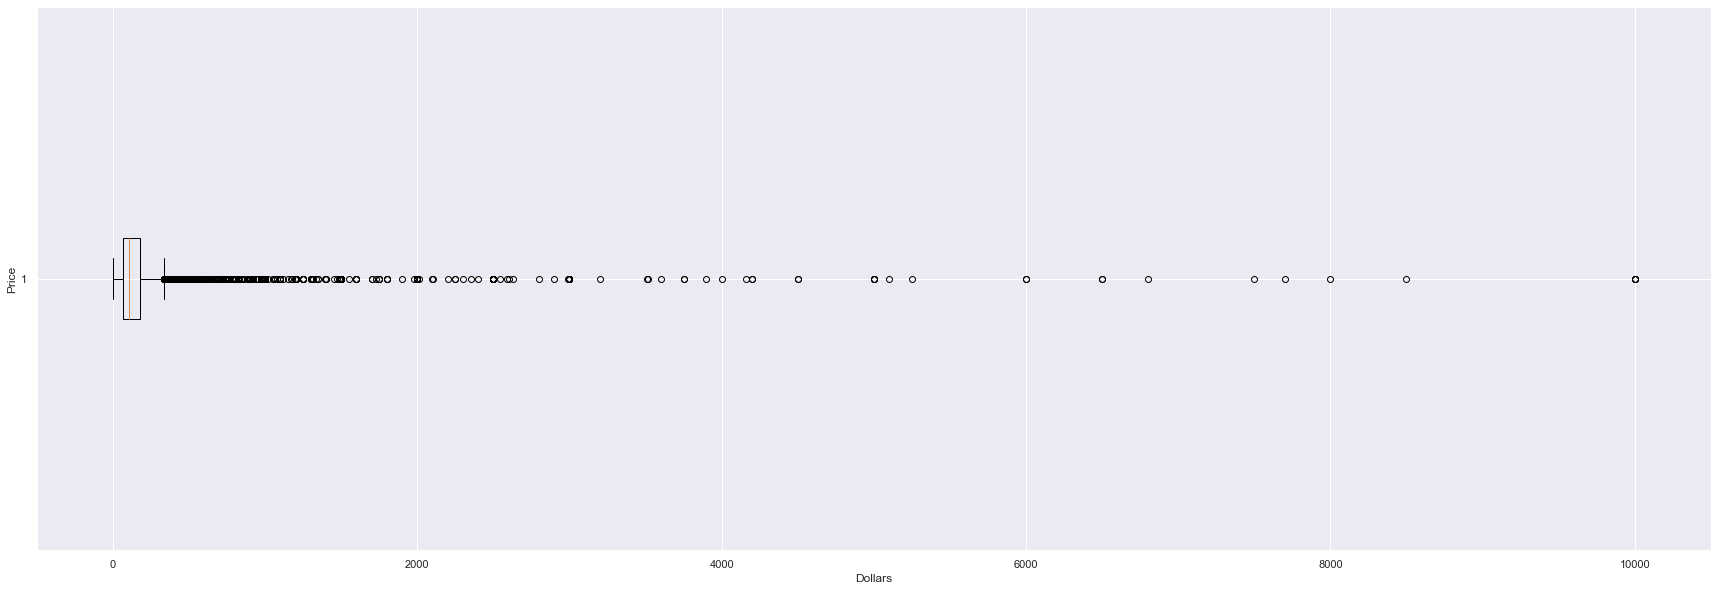

In [178]:
#boxplot for checking the price distribution
plt.figure(figsize = (30,10))
plt.boxplot(df['price'], vert = False)
plt.ylabel('Price')
plt.xlabel('Dollars')
plt.show()

**The prices are scattered and have heavy outliers**

In [179]:
#plotting in descending order to check which values to delete
df.sort_values(['price'], ascending = False, axis = 0).head(15)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
29644,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
12404,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,0.00,1,83
12523,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,0.00,1,365
20810,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
23350,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,2018-09-18,0.18,1,251
31293,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,2016-09-15,0.03,11,365
3719,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,NaN,0.00,12,146
15974,33007610,70' Luxury MotorYacht on the Hudson,7407743,Jack,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,NaN,0.00,1,364
7817,33998396,3000 sq ft daylight photo studio,3750764,Kevin,Manhattan,Chelsea,40.75060,-74.00388,Entire home/apt,6800,1,0,NaN,0.00,6,364
3754,2271504,SUPER BOWL Brooklyn Duplex Apt!!,11598359,Jonathan,Brooklyn,Clinton Hill,40.68766,-73.96439,Entire home/apt,6500,1,0,NaN,0.00,1,0


**The values get a bit continuous after 6000 - remove houses priced above 600**

In [180]:
#Dropping rows with high price
df.drop(df[df['price']>6000].index, inplace = True)
df.sort_values(['price'], ascending = False, axis = 0).head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11576,12520066,Luxury townhouse Greenwich Village,66240032,Linda,Manhattan,Greenwich Village,40.73046,-73.99562,Entire home/apt,6000,1,0,NaN,0.00,1,0
4969,2110145,UWS 1BR w/backyard + block from CP,2151325,Jay And Liz,Manhattan,Upper West Side,40.77782,-73.97848,Entire home/apt,6000,14,17,2015-02-17,0.27,1,359
31865,2243699,"SuperBowl Penthouse Loft 3,000 sqft",1483320,Omri,Manhattan,Little Italy,40.71895,-73.99793,Entire home/apt,5250,1,0,NaN,0.00,1,0
6868,33397385,Midtown Manhattan great location (Gramacy park),16105313,Debra,Manhattan,Midtown,40.74482,-73.98367,Entire home/apt,5100,30,1,2019-06-22,1.00,2,343
14648,21238053,Broadway 1,153497815,Sarah-B,Brooklyn,Bedford-Stuyvesant,40.68742,-73.91957,Entire home/apt,5000,2,8,2017-12-09,0.38,1,0
14314,18051877,Victorian Film location,2675644,Alissa,Staten Island,Randall Manor,40.63952,-74.09730,Entire home/apt,5000,1,0,NaN,0.00,1,344
28944,2919330,NearWilliamsburg bridge 11211 BK,14908606,Bianca,Brooklyn,Bedford-Stuyvesant,40.69572,-73.95731,Private room,5000,6,10,2016-01-02,0.16,1,363
24593,20654227,Fulton 2,100069033,Sarah-2,Brooklyn,Cypress Hills,40.68185,-73.88128,Entire home/apt,5000,2,4,2018-01-03,0.18,1,0
15704,35345358,Northside Williamsburg Stunner,956324,Alex,Brooklyn,Williamsburg,40.71705,-73.96470,Entire home/apt,4500,30,0,NaN,0.00,1,365
6600,2952861,Photography Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69127,-73.96563,Entire home/apt,4500,1,5,2018-12-29,0.09,11,365


In [181]:
#Dropping rows with min price i.e. 0
df.drop(df[df['price']==0].index, inplace = True)
df.sort_values(['price'], ascending = True, axis = 0).head(5)
df[df.price == df.price.min()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1503,17437106,Couch in Harlem Harvey Refugees only,33511962,Morgan,Manhattan,Harlem,40.81302,-73.95349,Shared room,10,1,0,NaN,0.00,1,0
4546,26496645,Room with a view,110049861,Martin,Brooklyn,Williamsburg,40.70959,-73.95693,Private room,10,1,0,NaN,0.00,1,83
5582,17979764,Jen Apt,84497333,Jennifer,Manhattan,SoHo,40.72237,-73.99817,Private room,10,5,2,2017-04-15,0.07,1,0
9851,18490141,IT'S SIMPLY CONVENIENT!,97001292,Maria,Queens,Jamaica,40.69085,-73.79916,Entire home/apt,10,1,43,2019-06-12,1.68,1,252
9973,26235873,Voted #1 Airbnb In NYC,197169969,Maria,Queens,Jamaica,40.68939,-73.79886,Entire home/apt,10,2,22,2019-07-06,1.76,1,332
10766,18835820,"Quiet, Cozy UES Studio Near the Subway",52777892,Amy,Manhattan,Upper East Side,40.76844,-73.95341,Entire home/apt,10,3,10,2018-10-22,0.39,1,0
13778,28071998,Cozy room in a three-bedroom House,47516406,Arthur,Queens,Woodhaven,40.69139,-73.86086,Private room,10,7,4,2018-10-08,0.41,2,180
14631,1620248,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,NaN,0.00,4,137
16917,28270998,"Charming, bright and brand new Bed-Stuy home",647528,Caterina,Brooklyn,Bedford-Stuyvesant,40.69508,-73.95164,Entire home/apt,10,3,5,2019-07-02,0.51,1,0
18422,17952277,"Newly renovated, fully furnished room in Brooklyn",62685070,Katie,Brooklyn,Bushwick,40.69974,-73.91935,Private room,10,5,0,NaN,0.00,1,0


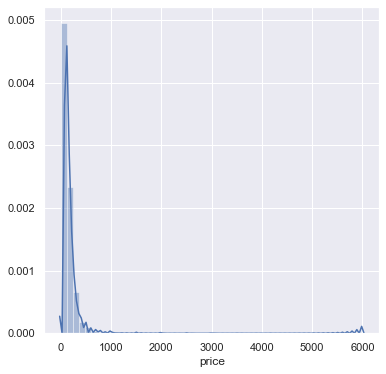

In [182]:
#Plotting a histogram for price column after cleaning
plt.figure(figsize=(6,6))
sns.distplot(df['price'])
plt.show()

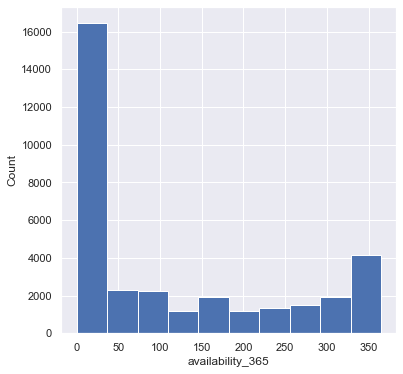

In [183]:
#Plotting a histogram for availability_365 column after cleaning
plt.figure(figsize=(6,6))
plt.hist(df['availability_365'])
plt.xlabel('availability_365')
plt.ylabel('Count')
plt.show()

In [184]:
df['price'].describe()

count    34206.000000
mean       150.895720
std        192.765399
min         10.000000
25%         69.000000
50%        107.000000
75%        175.000000
max       6000.000000
Name: price, dtype: float64

In [185]:
#minimum_nights outliers removal
df.sort_values('minimum_nights', ascending = False).head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
33538,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365
27885,1615764,Unknown,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,0.00,1,362
1554,30378211,Shared Studio (females only),200401254,Meg,Manhattan,Greenwich Village,40.73094,-73.99900,Shared room,110,999,0,NaN,0.00,1,365
19663,20990053,Beautiful place in Brooklyn! #2,151084261,Angie,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79,999,24,2018-06-28,1.12,6,249
17336,35834935,Williamsburg Apartment,82674375,Meg,Brooklyn,Williamsburg,40.70898,-73.94885,Entire home/apt,140,500,0,NaN,0.00,1,331
19816,8668115,Zen Room in Crown Heights Brooklyn,8996336,Laura,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50,500,10,2016-09-22,0.22,1,365
6184,6169897,Wonderful Large 1 bedroom,10720264,John,Manhattan,Harlem,40.82135,-73.95521,Entire home/apt,75,500,0,NaN,0.00,1,362
6743,568684,800sqft apartment with huge terrace,2798644,Alessandra,Brooklyn,Bushwick,40.70202,-73.92402,Entire home/apt,115,370,6,2018-04-15,0.09,1,365
14568,12888849,"Bright Luxury Studio, Central Loc.",16476167,Sarah,Manhattan,Midtown,40.74513,-73.98475,Entire home/apt,250,366,0,NaN,0.00,1,365
27937,258690,CHELSEA 1 Bdrm Plus Sleeping Loft!!,1359611,Andrea,Manhattan,Chelsea,40.74618,-74.00392,Entire home/apt,195,365,10,2014-10-26,0.12,1,0


**minimum_nights above 800 can be condisered as outliers**

In [186]:
#dropping rows with minimum_nights > 800
df.drop(df[df['minimum_nights']>800].index, inplace = True)
df.sort_values('minimum_nights', ascending = False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
6184,6169897,Wonderful Large 1 bedroom,10720264,John,Manhattan,Harlem,40.82135,-73.95521,Entire home/apt,75,500,0,NaN,0.00,1,362
19816,8668115,Zen Room in Crown Heights Brooklyn,8996336,Laura,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50,500,10,2016-09-22,0.22,1,365
17336,35834935,Williamsburg Apartment,82674375,Meg,Brooklyn,Williamsburg,40.70898,-73.94885,Entire home/apt,140,500,0,NaN,0.00,1,331
6743,568684,800sqft apartment with huge terrace,2798644,Alessandra,Brooklyn,Bushwick,40.70202,-73.92402,Entire home/apt,115,370,6,2018-04-15,0.09,1,365
14568,12888849,"Bright Luxury Studio, Central Loc.",16476167,Sarah,Manhattan,Midtown,40.74513,-73.98475,Entire home/apt,250,366,0,NaN,0.00,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,10886372,BK Bedroom in a Comfortable Apartment by the P...,56410306,Cole,Brooklyn,Prospect-Lefferts Gardens,40.66070,-73.96168,Private room,60,1,0,NaN,0.00,1,0
5523,3122230,Cozy Harlem Home,15859636,Kyle,Manhattan,Harlem,40.81595,-73.94470,Private room,125,1,0,NaN,0.00,1,0
22115,30928305,Mesmerized Penthouse,213781715,Anting,Manhattan,NoHo,40.72886,-73.99139,Entire home/apt,179,1,0,NaN,0.00,33,364
22116,17902970,Great location in the heart of Manhattan,122679380,Sam,Manhattan,Hell's Kitchen,40.76313,-73.98978,Private room,100,1,216,2019-07-01,8.07,1,43


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


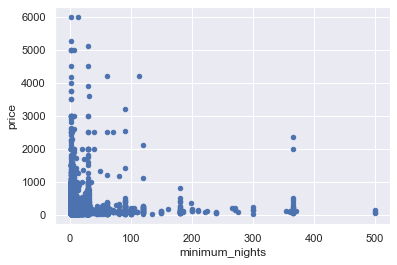

In [187]:
#price VS minimum_nights after removing all outliers
df.plot.scatter(y = 'price', x = 'minimum_nights' )
plt.show()

**for lower minimum_nights there is a range of prices till max - for lower prices there are different minimum_nights values**

In [188]:
#availability_365 outliers
df[df['availability_365']==0].count()

id                                12252
name                              12252
host_id                           12252
host_name                         12252
neighbourhood_group               12252
neighbourhood                     12252
latitude                          12252
longitude                         12252
room_type                         12252
price                             12252
minimum_nights                    12252
number_of_reviews                 12252
last_review                        8901
reviews_per_month                 12252
calculated_host_listings_count    12252
availability_365                  12252
dtype: int64

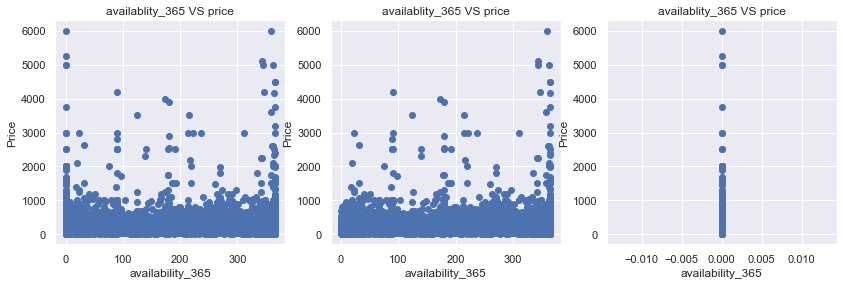

In [189]:

fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)

ax1.scatter(x = df['availability_365'], y = df['price'])
ax1.set_ylabel("Price")
ax1.set_xlabel("availability_365")
ax1.set_title('availablity_365 VS price')


dfa = df.drop(df[df['availability_365']==0].index)
ax2.scatter(x = dfa['availability_365'], y = dfa['price'])
ax2.set_ylabel("Price")
ax2.set_xlabel("availability_365")
ax2.set_title('availablity_365 VS price')


dfc = df[df['availability_365']==0]
ax3.scatter(x = dfc['availability_365'], y = dfc['price'])
ax3.set_ylabel("Price")
ax3.set_xlabel("availability_365")
ax3.set_title('availablity_365 VS price')
plt.show()

**We will lose valuable infnormation if we drop rows with 0 availability_365 as most of them are concentrated in the price range 0-2000 which is the main part of the dataset**

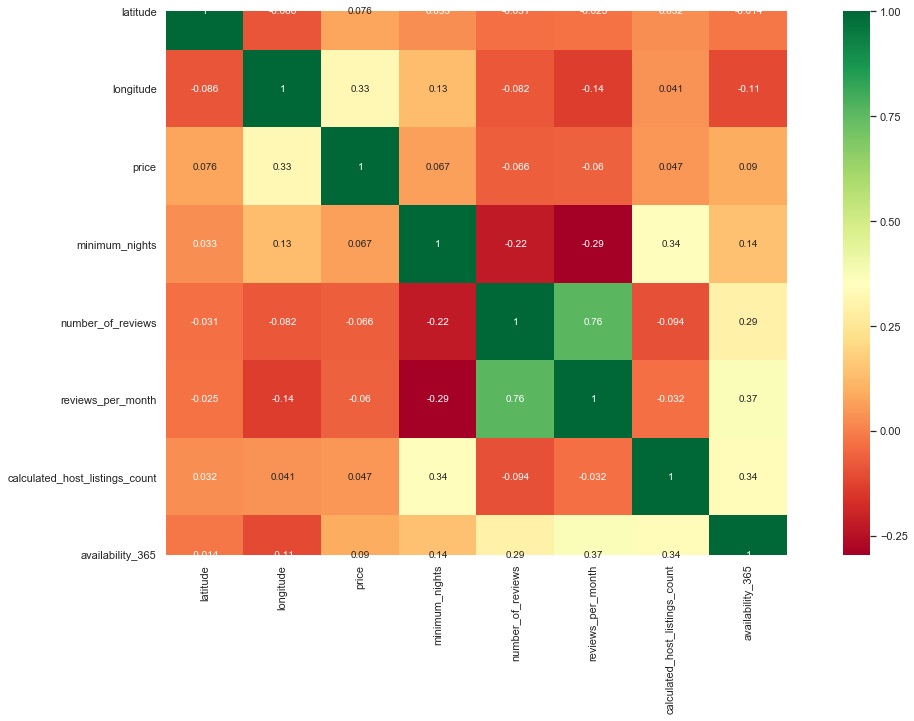

In [190]:
#Heat map between numerical variables
#separate out numerical variables
a=pd.DataFrame(df.dtypes.copy())
b= a[a[0] != 'object'].reset_index()
#drop id and host id:
numeric_vars=b["index"].tolist()[2:]

plt.figure(figsize = (20,10))
x=df[numeric_vars].apply(lambda x: np.log(np.abs(x+1))).corr(method='pearson')
sns.heatmap(x, annot=True, square=True, cmap='RdYlGn')
plt.show()

**Observations on price:

1. price seems to be positively correlated with longitude meaning - Manhattan most expensive
2. latitude seems to have lesser effect on the price - higher prices located in the northern parts of the city
3. price is slightly positively correlated with - increasing availability, the fact that the property is rented by a host who lists other properties - increasing number of minimum nights
4. price is negatively correlated with number of reviews and reviews per month - possible that the prior reviews could reduce the prices to some extent

**Other interesting observations:

1. calculated host lisitng count is positively correlated with minimum nights and availability_365 indicating that hosts who list more than one property may be more strategic rather than opportunisitic about their rentals. That may attempt to maximize the amount of time a single renter stays at their property to minimize turnover cost. They also tend to maximize the amount of time the property is being rented.

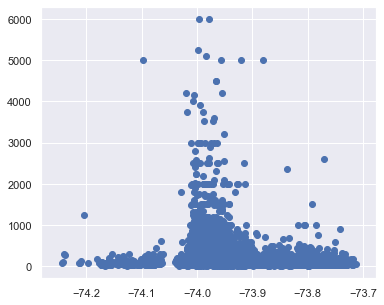

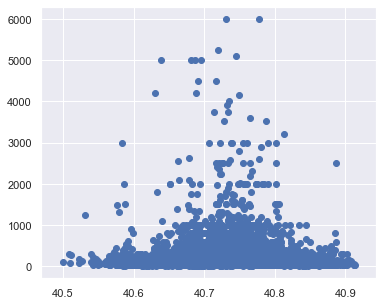

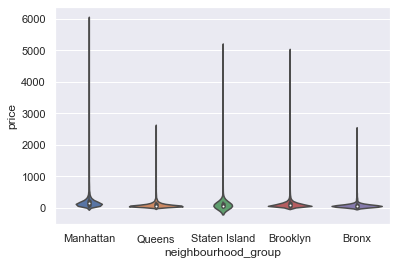

In [191]:
#Location is an important factor. Therefore, checking how mean prices vary by neighbourhood
#Lets look at prices based on latitude (note that Mahattan has higher latitude values)
plt.figure(figsize = (6,5))
plt.scatter(y = 'price', x = 'longitude', data = df)
plt.show()

plt.figure(figsize = (6,5))
plt.scatter(y = 'price', x = 'latitude', data = df)
plt.show()

sns.violinplot(x="neighbourhood_group", y="price", data=df)
plt.show()

**Manhattan > Staten Island > Brooklyn > Queens > Bronx**

# one hot encode - neighbourhood_group, room_type, neighbourhood

In [192]:
#getting dummies for room_type
room_dummies = pd.get_dummies(df.room_type)
room_dummies

,Entire home/apt,Private room,Shared room
0,0,1,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
34221,1,0,0
34222,0,1,0
34223,1,0,0
34224,0,1,0


In [193]:
#merging the dummies with the dataframe
merged_rooms = pd.concat([df,room_dummies], axis = 'columns')
#arranging the columns
merged_rooms = merged_rooms[['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type','Entire home/apt', 'Private room', 'Shared room',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365','price']]
#dropping room_type column and a dummy variabel to avoid the dummy variable trap
merged_rooms.drop(['room_type', 'Shared room'], axis = 'columns', inplace = True)
merged_rooms

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,Entire home/apt,Private room,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,0,1,7,3,0.06,3,0,120
1,2243769,Super Bowl New York City Apartment,11460768,Brian,Manhattan,Upper West Side,40.80020,-73.96045,1,0,1,0,0.00,1,0,1500
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.75558,-73.89316,1,0,2,4,4.00,1,365,200
3,36202006,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,Staten Island,Concord,40.60110,-74.07830,0,0,2,0,0.00,4,82,30
4,3780951,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.81022,-73.94266,0,0,1,16,0.27,1,365,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34221,28342248,Ridgewood retreat,120730056,Sophie,Queens,Ridgewood,40.70602,-73.90485,1,0,5,2,0.21,1,0,80
34222,8438775,Private BR & Bath near Central Park,41042927,Gabi,Manhattan,Upper West Side,40.77697,-73.97698,0,1,1,163,3.55,1,32,137
34223,27332770,Warm Home w/ Private Garden (Inwood Manhattan ...,80381355,Mary,Manhattan,Inwood,40.86912,-73.92183,1,0,2,6,0.53,1,0,195
34224,9063972,Chill Bushwick Suite,3040551,Olu Bliss,Brooklyn,Bushwick,40.69709,-73.91435,0,1,3,0,0.00,1,0,80


In [194]:
#getting dummies for neighbourhood_group
ngroup_dummies = pd.get_dummies(df.neighbourhood_group)
ngroup_dummies

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,0,0,1
4,0,0,1,0,0
...,...,...,...,...,...
34221,0,0,0,1,0
34222,0,0,1,0,0
34223,0,0,1,0,0
34224,0,1,0,0,0


In [195]:
#merging the dummies with the dataframe
merged_ngroup = pd.concat([ngroup_dummies,merged_rooms], axis = 'columns')
merged_ngroup
#drop neighbourhood_group and a dummy variable(Staten Island)
merged_ngroup.drop(['neighbourhood_group','Staten Island'], axis = 'columns', inplace = True)
merged_ngroup = merged_ngroup[['id', 'name', 'host_id',
       'host_name','Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'neighbourhood', 'latitude', 'longitude',
       'Entire home/apt', 'Private room', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price']]
merged_ngroup.head(5)

,id,name,host_id,host_name,Bronx,Brooklyn,Manhattan,Queens,neighbourhood,latitude,longitude,Entire home/apt,Private room,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,5728806,Large private room in Nolita,4271676,Nat,0,0,1,0,Nolita,40.72217,-73.99481,0,1,7,3,0.06,3,0,120
1,2243769,Super Bowl New York City Apartment,11460768,Brian,0,0,1,0,Upper West Side,40.80020,-73.96045,1,0,1,0,0.00,1,0,1500
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,0,0,0,1,East Elmhurst,40.75558,-73.89316,1,0,2,4,4.00,1,365,200
3,36202006,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,0,0,0,0,Concord,40.60110,-74.07830,0,0,2,0,0.00,4,82,30
4,3780951,Charming Harlem apartment,16065171,Gina,0,0,1,0,Harlem,40.81022,-73.94266,0,0,1,16,0.27,1,365,115


No dummies for neighbourhood since there are 216 columns - doesn't solve any purpose

In [196]:
#Assigning a final dataframe
df1 = merged_ngroup
df1.head(2)

,id,name,host_id,host_name,Bronx,Brooklyn,Manhattan,Queens,neighbourhood,latitude,longitude,Entire home/apt,Private room,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,5728806,Large private room in Nolita,4271676,Nat,0,0,1,0,Nolita,40.72217,-73.99481,0,1,7,3,0.06,3,0,120
1,2243769,Super Bowl New York City Apartment,11460768,Brian,0,0,1,0,Upper West Side,40.80020,-73.96045,1,0,1,0,0.00,1,0,1500


# NLP on the name column

In [197]:
#Removing punctuations, digits and special characters
def remove_punct(line):
    return re.sub('[^A-Za-z]+', ' ', line).lower()

df1['clean_name'] = df1['name'].apply(remove_punct)

In [198]:
df1[['name', 'clean_name']]

,name,clean_name
0,Large private room in Nolita,large private room in nolita
1,Super Bowl New York City Apartment,super bowl new york city apartment
2,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,cozy apt close to lga jfk and transportation
3,Stream-Pressed Paradise (Laundry Room Setup),stream pressed paradise laundry room setup
4,Charming Harlem apartment,charming harlem apartment
...,...,...
34221,Ridgewood retreat,ridgewood retreat
34222,Private BR & Bath near Central Park,private br bath near central park
34223,Warm Home w/ Private Garden (Inwood Manhattan ...,warm home w private garden inwood manhattan nyc
34224,Chill Bushwick Suite,chill bushwick suite


In [199]:
#Removing stopwords
stop = stopwords.words('english')
df1['clean_name'] = df1['clean_name'].apply(word_tokenize)

In [200]:
def tokenize_no_stopwords(line):
    tokens_no_stop = [w for w in line if w not in stop]
    return " ".join(tokens_no_stop)

df1['clean_name'] = df1['clean_name'].apply(lambda x: tokenize_no_stopwords(x))
df1.head(5)

,id,name,host_id,host_name,Bronx,Brooklyn,Manhattan,Queens,neighbourhood,latitude,longitude,Entire home/apt,Private room,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price,clean_name
0,5728806,Large private room in Nolita,4271676,Nat,0,0,1,0,Nolita,40.72217,-73.99481,0,1,7,3,0.06,3,0,120,large private room nolita
1,2243769,Super Bowl New York City Apartment,11460768,Brian,0,0,1,0,Upper West Side,40.80020,-73.96045,1,0,1,0,0.00,1,0,1500,super bowl new york city apartment
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,0,0,0,1,East Elmhurst,40.75558,-73.89316,1,0,2,4,4.00,1,365,200,cozy apt close lga jfk transportation
3,36202006,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,0,0,0,0,Concord,40.60110,-74.07830,0,0,2,0,0.00,4,82,30,stream pressed paradise laundry room setup
4,3780951,Charming Harlem apartment,16065171,Gina,0,0,1,0,Harlem,40.81022,-73.94266,0,0,1,16,0.27,1,365,115,charming harlem apartment


In [201]:
#Concatenate the words in one string
text = " "
for i in df1['clean_name']:
    text += " " + i
print(text)

  large private room nolita super bowl new york city apartment cozy apt close lga jfk transportation stream pressed paradise laundry room setup charming harlem apartment lower manhattan luxury spacious clean studio apartment bright luxury apartment amazing view city chelsea brownstone bedroom house heights private room cool bk apt private room trendy williamsburg loft cute clean studio central harlem entire spacious bed apt uws lux blg prime area lg private rm bath w views one bed luxury columbus circle private br mid century modern apt modern east williamsburg apartment comfy modern appartment hip crown heights bedroom apt bridges chinatown friendly room bright spacious room bushwick new stylish bedroom williamsburg spacious bright room art filled apartment large sunny private studio apt r renovated greenpoint apartment serenity heart spacious bright sleeps soho ft greene garden gem large convenient comfortable room close manhattan sun drenched bedroom carroll gardens spacious apt min

In [202]:
#Tokenize into separate words
tokenized = nltk.tokenize.word_tokenize(text)
print(tokenized)

['large', 'private', 'room', 'nolita', 'super', 'bowl', 'new', 'york', 'city', 'apartment', 'cozy', 'apt', 'close', 'lga', 'jfk', 'transportation', 'stream', 'pressed', 'paradise', 'laundry', 'room', 'setup', 'charming', 'harlem', 'apartment', 'lower', 'manhattan', 'luxury', 'spacious', 'clean', 'studio', 'apartment', 'bright', 'luxury', 'apartment', 'amazing', 'view', 'city', 'chelsea', 'brownstone', 'bedroom', 'house', 'heights', 'private', 'room', 'cool', 'bk', 'apt', 'private', 'room', 'trendy', 'williamsburg', 'loft', 'cute', 'clean', 'studio', 'central', 'harlem', 'entire', 'spacious', 'bed', 'apt', 'uws', 'lux', 'blg', 'prime', 'area', 'lg', 'private', 'rm', 'bath', 'w', 'views', 'one', 'bed', 'luxury', 'columbus', 'circle', 'private', 'br', 'mid', 'century', 'modern', 'apt', 'modern', 'east', 'williamsburg', 'apartment', 'comfy', 'modern', 'appartment', 'hip', 'crown', 'heights', 'bedroom', 'apt', 'bridges', 'chinatown', 'friendly', 'room', 'bright', 'spacious', 'room', 'bushwi

In [203]:
#Create a frequency dictionary
freqd = nltk.FreqDist(w for w in tokenized)

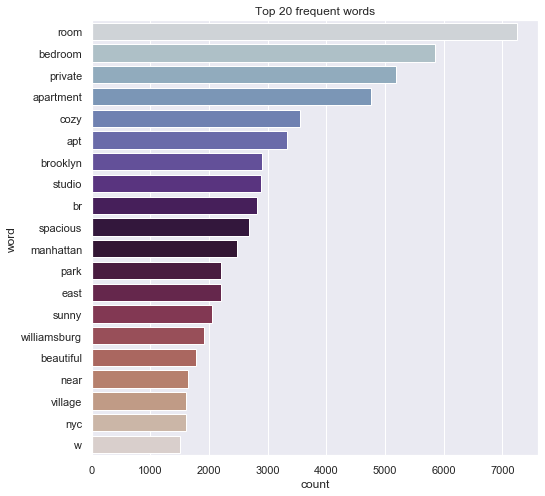

In [204]:
def plot_most_common(dict_data ,title):
    df = pd.DataFrame(dict_data)
    df.columns = ['word', 'count']
    plt.figure(figsize=(8, 8))
    sns.set(style="darkgrid")
    sns.barplot(x="count", y="word", data=df, palette='twilight')
    plt.title(title)
    plt.show()
    
plot_most_common(freqd.most_common(20), 'Top 20 frequent words')

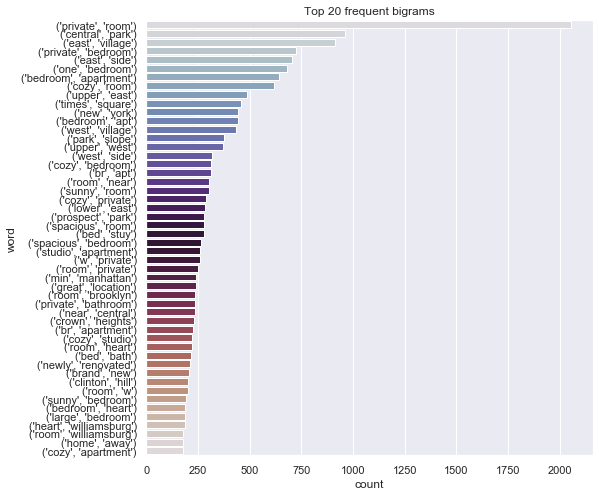

In [205]:
#MOst frequent Bigrams
freq_dict_bigrams = nltk.FreqDist(nltk.bigrams(w for w in tokenized))
plot_most_common(freq_dict_bigrams.most_common(50), 'Top 20 frequent bigrams')

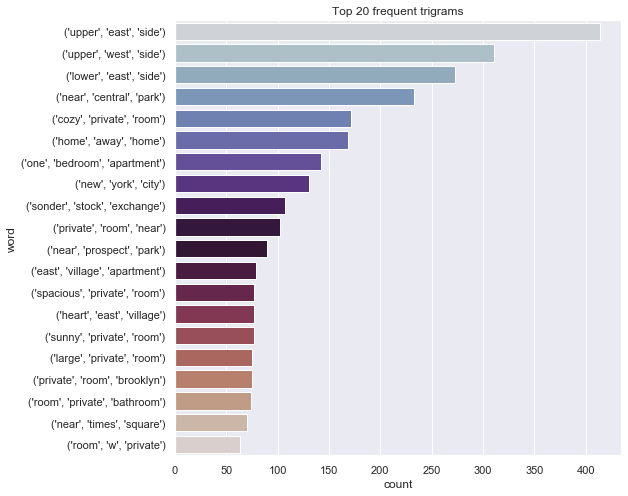

167950


In [206]:
#Most frequent Trigrams
freq_dict_trigrams = nltk.FreqDist(nltk.trigrams(w for w in tokenized))
plot_most_common(freq_dict_trigrams.most_common(20), 'Top 20 frequent trigrams')
print(len(tokenized))

# Exploring the titles of the appartments that cost more than 700 for a night.

In [207]:
costly = df1[df1['price']>800]
print(costly.shape)
print(df1.shape)

(292, 20)
(34202, 20)


In [208]:
# first, we need to concatenate all descriptions in one string
costly_text = ""
for i in costly['clean_name']:
    costly_text += " " + i

In [209]:
# next, we tokenize it into separate words
tokenized_costly_text = nltk.tokenize.word_tokenize(costly_text)

In [210]:
# finally, create a frequency dictionary with the help of nltk
freq_dict_costly = nltk.FreqDist(w for w in tokenized_costly_text)

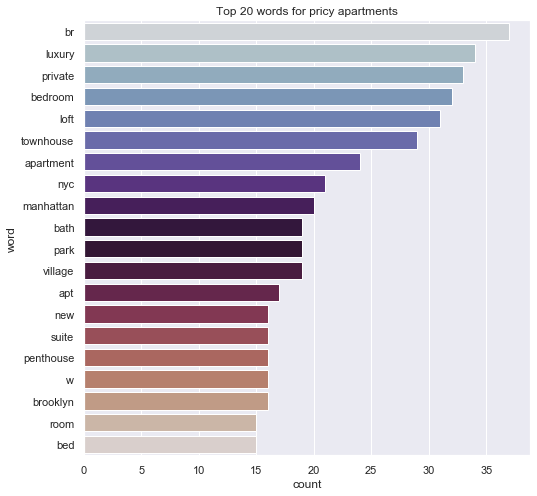

In [211]:
plot_most_common(freq_dict_costly.most_common(20), "Top 20 words for pricy apartments")

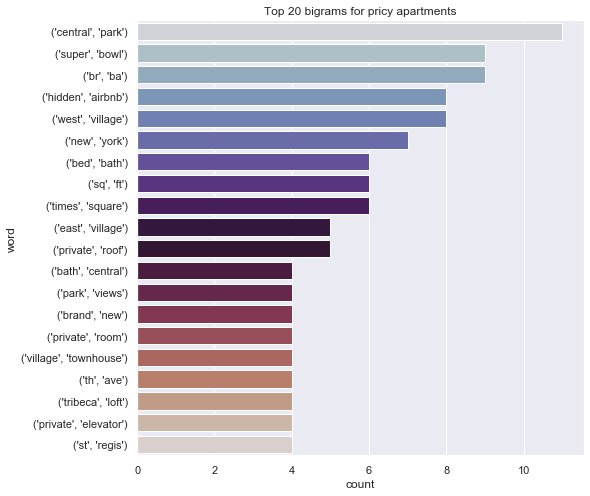

In [212]:
freq_dict_bigrams_costly = nltk.FreqDist(nltk.bigrams(w for w in tokenized_costly_text))
plot_most_common(freq_dict_bigrams_costly.most_common(20), "Top 20 bigrams for pricy apartments")

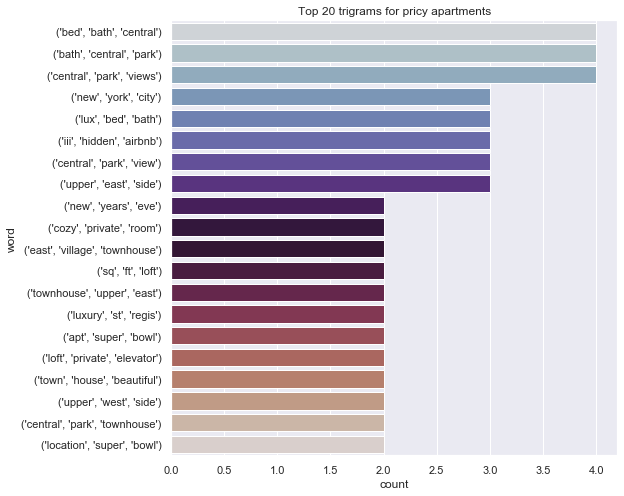

In [213]:
freq_dict_trigrams_costly = nltk.FreqDist(nltk.trigrams(w for w in tokenized_costly_text))
plot_most_common(freq_dict_trigrams_costly.most_common(20), "Top 20 trigrams for pricy apartments")

**167950 tokenized words. The following frequency distribution is compared to these:
•	While searching for the most frequent words used in the name column – 
o	The 5 most frequently used words (room, bedroom, private, apartment, cozy) could help us understand the type of room and the number of bedrooms/ area of the room, whether it is private or shared room, whether it is an apartment or a studio, the comfort level of the house.
o	We can cluster it into 1. Studio or apartment 2. Based on number of rooms 
o	The problem – we don’t kniw if the words are used in the same context that we are thinking it to be in
o	Therefore, need to make a bigram where we learn which word is commonly paired with these 5 words

•	Bigram(Analyzing top 50 bigrams):
o	rooms are private rooms (a little over 2000 houses)
o	Have a central park around (around 900 houses)
o	approx 700 houses have private bedrooms
o	approx 680-690 houses have 1 bedroom
o	600 houses are bedroom aparment
o	only around 270 houses are described being near to a landmark location which is a very small percentage. Hence, using this knowledge to find the price of a house near this landmark location is not useful
o	most of the descriptions have only used adjectives for the room. Which don't say a lot about the room as it depends on the perspective
o	newly renovated, brand new, together make 500 data points and justify the reason for those rooms to be highly priced
•	from univariate analysis of ‘price’ column we remember :
o	mostly budget homes
o	most houses in between 10 to 600
o	Most apparntments can be rented with approximately 175
•	exploring the titles of the appartments that cost more than 1k for a night:
o	since our dataset has more houses in 10-600 range we consider houses above 800 as expensive
o	there are 294 houses that are expensive
o	plotting top 20 most frequent words – 
o	only 20% descriptions have the word luxury
o	9.5% are townhouses
o	NYC > Manhattan > Brooklyn

In [214]:
x = df1.drop(['price','name','host_name','neighbourhood','clean_name'],axis = 1)
y = df1['price']

In [215]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=33)

# Random Forest

In [216]:
from sklearn.ensemble import GradientBoostingRegressor ,RandomForestRegressor
rf_model = RandomForestRegressor(random_state=33)
param_grid = dict(n_estimators=range(10,100,10),max_depth=range(3,20),min_samples_split=range(50,500,20),min_samples_leaf=range(25,75,10),max_leaf_nodes=range(8,32,2))
grid_rf = RandomizedSearchCV(rf_model,param_grid,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,random_state=33)
grid_rf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...,

In [217]:
#rf_pred = grid_rf.best_estimator_.predict(X_val)
rf_pred1 = grid_rf.best_estimator_.predict(x_test)

#rf_pred = np.exp(rf_pred)-1
#rf_pred1 = np.exp(rf_pred1)-1
print(grid_rf.best_params_)

#print('Test RMSLE:',np.sqrt(mean_squared_log_error(y_test, rf_pred)))
#print('Val RMSE:',np.sqrt(mean_squared_error(y_val, rf_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, rf_pred1)))
#print("R2_score: ",r2_score(y_test,rf_pred))

{'n_estimators': 70, 'min_samples_split': 70, 'min_samples_leaf': 25, 'max_leaf_nodes': 28, 'max_depth': 18}
Test RMSE: 178.31113788657


# Decision Tree

In [218]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
dt_reg = DecisionTreeRegressor(random_state=42)
param_grid = dict(max_depth=range(5,20), min_samples_split=range(50,200,10), min_samples_leaf=range(25,100,10), max_leaf_nodes=range(8,32,2), min_impurity_decrease=(0.3,1.0,0.1))
grid_dt = RandomizedSearchCV(dt_reg, param_grid, scoring='neg_mean_squared_error', n_jobs=4, cv=5, random_state=33)
grid_dt.fit(x_train,y_train)
#dt_pred = grid_dt.best_estimator_.predict(X_val)
dt_pred1 = grid_dt.best_estimator_.predict(x_test)
#dt_pred = np.exp(dt_pred)-1
#dt_pred1 = np.exp(dt_pred1)-1
print(grid_dt.best_params_)

#print('Test RMSLE:',np.sqrt(mean_squared_log_error(y_test, dt_pred)))
#print('Val RMSE:',np.sqrt(mean_squared_error(y_val, dt_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, dt_pred1)))
#print("R2_score: ",r2_score(y_test,dt_pred))

{'min_samples_split': 60, 'min_samples_leaf': 55, 'min_impurity_decrease': 0.1, 'max_leaf_nodes': 26, 'max_depth': 8}
Test RMSE: 180.37546671770733


# XGBoost

In [219]:
from xgboost import XGBRegressor 
grid_xgb = XGBRegressor(objective='reg:squarederror',n_jobs=-1,subsample = 0.7, scale_pos_weight= 5, reg_lambda= 4, n_estimators = 110, min_child_weight= 13, max_depth = 12, learning_rate= 0.1, colsample_bytree = 0.9, colsample_bynode= 0.9)
grid_xgb.fit(x_train,y_train)
#xgb_pred = grid_xgb.best_estimator_.predict(X_val)
xgb_pred1 = grid_xgb.predict(x_test)

#xgb_pred = np.exp(xgb_pred)-1
#xgb_pred1 = np.exp(xgb_pred1)-1
#print(grid_xgb.best_params_)
#print(grid_xgb.best_estimator_)

#print('Test RMSLE:',np.sqrt(mean_squared_log_error(y_test, xgb_pred)))
#print('Val RMSE:',np.sqrt(mean_squared_error(y_val, xgb_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, xgb_pred1)))
#3print("R2_score: ",r2_score(y_test,xgb_pred))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Test RMSE: 170.44845090696037


# TEST DATA EVALUATION

**Performing same modfications on test data as done on train data**

In [220]:
#loading the file onto a dataframe
dt = pd.read_csv('Test.csv')

In [221]:
#Reading the first 4 rows
dt.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1525602,Perfect Temporary Brooklyn Home,1200603,Andrea,Brooklyn,Crown Heights,40.66751,-73.95867,Entire home/apt,2,121,2019-05-31,1.70,1,39
1,30430185,BIG APPLE - COMFY KING ROOM,224414117,Gabriel,Manhattan,Hell's Kitchen,40.75655,-73.99690,Private room,1,18,2019-05-05,2.49,30,364
2,21354525,Cozy Brooklyn Heights Getaway w/ Manhattan Access,11743513,Henry,Brooklyn,Brooklyn Heights,40.69252,-73.99121,Private room,1,87,2019-06-16,4.29,1,108
3,35995074,Amazing*Quiet*Sunny*Bedroom*PrivateLivingRm*Ch...,4128829,Sara,Queens,Ditmars Steinway,40.77292,-73.90101,Private room,9,0,NaN,NaN,2,365


In [222]:
dt_ID = dt['id']

**Applying modifications**

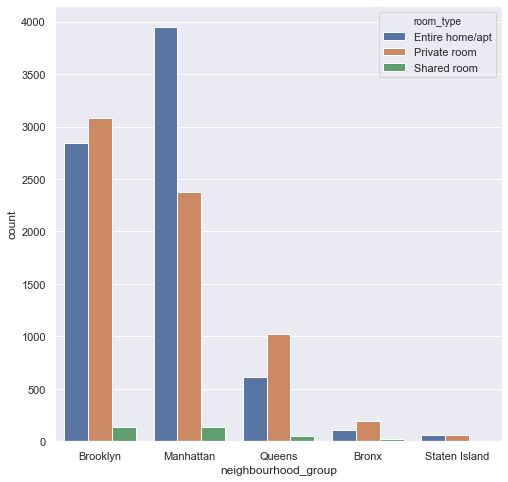

In [223]:
#Check neighbourhood_group and room_type count distribution
plt.figure(figsize = (8,8))
sns.countplot(x="neighbourhood_group",hue = 'room_type', data=dt)
plt.show()

**The distribution is almost similar to the train dataset. Therefore, the predictions should be commensurate as well**

In [224]:
##Replacing null values in host_name with Unknown
dt["host_name"] = dt["host_name"].fillna("Unknown")

In [225]:
#Replacing null values in name with Unknown
dt["name"] = dt["name"].fillna("Unknown")

In [226]:
#Replacing null values in reviews_per_month with 0
dt["reviews_per_month"] = dt["reviews_per_month"].fillna(0)

In [227]:
#ONE HOT ENCODE neighbourhood_group
#getting dummies for room_type
test_room_dummies = pd.get_dummies(dt.room_type)
test_room_dummies
#merging the dummies with the dataframe
test_merged_rooms = pd.concat([dt,test_room_dummies], axis = 'columns')
#dropping room_type column and a dummy variable to avoid the dummy variable trap
test_merged_rooms.drop(['room_type', 'Shared room'], axis = 'columns', inplace = True)
test_merged_rooms

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room
0,1525602,Perfect Temporary Brooklyn Home,1200603,Andrea,Brooklyn,Crown Heights,40.66751,-73.95867,2,121,2019-05-31,1.70,1,39,1,0
1,30430185,BIG APPLE - COMFY KING ROOM,224414117,Gabriel,Manhattan,Hell's Kitchen,40.75655,-73.99690,1,18,2019-05-05,2.49,30,364,0,1
2,21354525,Cozy Brooklyn Heights Getaway w/ Manhattan Access,11743513,Henry,Brooklyn,Brooklyn Heights,40.69252,-73.99121,1,87,2019-06-16,4.29,1,108,0,1
3,35995074,Amazing*Quiet*Sunny*Bedroom*PrivateLivingRm*Ch...,4128829,Sara,Queens,Ditmars Steinway,40.77292,-73.90101,9,0,NaN,0.00,2,365,0,1
4,34392081,Hello! This is a very cozy space in Williamsburg.,259630588,Alina,Brooklyn,Williamsburg,40.71863,-73.94980,1,28,2019-06-26,14.00,2,20,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,27730191,"Stylish, Artsy & Comfortable Stay Near the Ocean.",32215382,Polina,Brooklyn,Sheepshead Bay,40.59446,-73.94289,2,1,2019-05-20,0.59,1,36,1,0
14665,29676417,New York Moments (Ladies Only),223248121,Julia,Manhattan,Kips Bay,40.74319,-73.98074,2,1,2019-01-01,0.16,1,365,0,0
14666,1813829,Enjoy Harlem Renassiance Sunny Room,9501531,Andre,Manhattan,Harlem,40.82519,-73.94530,1,93,2019-07-02,1.34,3,358,0,1
14667,25017403,Glamping Van,10407935,Meng,Manhattan,Nolita,40.72238,-73.99466,1,15,2019-05-27,1.12,8,34,1,0


In [228]:
#getting dummies for neighbourhood_group
test_ngroup_dummies = pd.get_dummies(dt.neighbourhood_group)
test_ngroup_dummies
#merging the dummies with the dataframe
test_merged_ngroup = pd.concat([test_merged_rooms, test_ngroup_dummies], axis = 'columns')
test_merged_ngroup
#drop neighbourhood_group and a dummy variable(Staten Island)
test_merged_ngroup.drop(['neighbourhood_group','Staten Island'], axis = 'columns', inplace = True)
test_merged_ngroup.head(2)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Bronx,Brooklyn,Manhattan,Queens
0,1525602,Perfect Temporary Brooklyn Home,1200603,Andrea,Crown Heights,40.66751,-73.95867,2,121,2019-05-31,1.70,1,39,1,0,0,1,0,0
1,30430185,BIG APPLE - COMFY KING ROOM,224414117,Gabriel,Hell's Kitchen,40.75655,-73.99690,1,18,2019-05-05,2.49,30,364,0,1,0,0,1,0


In [229]:
test_merged_ngroup = test_merged_ngroup[['id', 'name', 'host_id',
       'host_name','Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'neighbourhood', 'latitude', 'longitude',
       'Entire home/apt', 'Private room', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']]
test_merged_ngroup.drop(['name','host_name','neighbourhood'],axis =1, inplace = True)
test_merged_ngroup.head(2)

,id,host_id,Bronx,Brooklyn,Manhattan,Queens,latitude,longitude,Entire home/apt,Private room,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1525602,1200603,0,1,0,0,40.66751,-73.95867,1,0,2,121,1.70,1,39
1,30430185,224414117,0,0,1,0,40.75655,-73.99690,0,1,1,18,2.49,30,364


In [230]:
test_y_pred = grid_xgb.predict(test_merged_ngroup)

In [231]:
test_y_pred

array([129.82959, 197.02779,  89.67285, ...,  60.91611, 287.80304,
       115.12203], dtype=float32)

In [232]:
submission_file = pd.DataFrame(test_y_pred,index = dt_ID,columns = ['price'])

In [233]:
submission_file.head()

,price
id,
1525602,129.829590
30430185,197.027786
21354525,89.672852
35995074,77.588501
34392081,84.151367


In [234]:
submission_file.to_csv('submission_file_BOTSnBOTS.csv', index=True)